<a href="https://colab.research.google.com/github/juhz846/sportsbetting_project/blob/main/wr_2024model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo pip install beautifulsoup4
!sudo pip install xgboost
!sudo pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 5.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.2
    Uninstalling xgboost-2.1.2:
      Successfully uninstalled xgboost-2.1.2


In [ ]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import xgboost as xgb
import pandas as pd
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [ ]:
def switch_opp(opp):
  match opp:
    case "BAL":
      return 26.2
    case "@BAL":
      return 26.2
    case "HOU":
      return 25.1
    case "@HOU":
      return 25.1
    case "MIN":
      return 25.7
    case "@MIN":
      return 25.7
    case "JAX":
      return 25.2
    case "@JAX":
      return 25.2
    case "NO":
      return 23.5
    case "@NO":
      return 23.5
    case "ATL":
      return 23.4
    case "@ATL":
      return 23.4
    case "NE":
      return 21.5
    case "@NE":
      return 21.5
    case "WAS":
      return 21.4
    case "@WAS":
      return 21.4
    case "LAR":
      return 23.0
    case "@LAR":
      return 23.0
    case "DET":
      return 23.0
    case "@DET":
      return 23.0
    case "TB":
      return 23.0
    case "@TB":
      return 23.0
    case "CLE":
      return 24.6
    case "@CLE":
      return 24.6
    case "CIN":
      return 22.1
    case "@CIN":
      return 22.1
    case "IND":
      return 20.1
    case "@IND":
      return 20.1
    case "DAL":
      return 20.7
    case "@DAL":
      return 20.7
    case "KC":
      return 20.7
    case "@KC":
      return 20.7
    case "LAC":
      return 20.6
    case "@LAC":
      return 20.6
    case "SEA":
      return 20.3
    case "@SEA":
      return 20.3
    case "NYG":
      return 20.1
    case "@NYG":
      return 20.1
    case "ARI":
      return 19.9
    case "@ARI":
      return 19.9
    case "LV":
      return 19.4
    case "@LV":
      return 19.4
    case "CAR":
      return 19.4
    case "@CAR":
      return 19.4
    case "PIT":
      return 19.1
    case "@PIT":
      return 19.1
    case "SF":
      return 18.9
    case "@SF":
      return 18.9
    case "TEN":
      return 18.6
    case "@TEN":
      return 18.6
    case "GB":
      return 18.3
    case "@GB":
      return 18.3
    case "PHI":
      return 18.2
    case "@PHI":
      return 18.2
    case "CHI":
      return 18.0
    case "@CHI":
      return 18.0
    case "NYJ":
      return 17.3
    case "@NYJ":
      return 17.3
    case "MIA":
      return 16.7
    case "@MIA":
      return 16.7
    case "BUF":
      return 16.4
    case "@BUF":
      return 16.4
    case "DEN":
      return 16.3
    case "@DEN":
      return 16.3


In [ ]:
# this block of code parses the html files that we just saved and turns it into a pandas dataframe

from bs4 import BeautifulSoup
import csv
import pandas as pd
import os
from datetime import datetime

# concussion_file = '/content/drive/My Drive/SportsBetting Project/Concussion Injuries 2012-2014.csv'
# df = pd.read_csv(concussion_file)
#

dir = '/content/drive/My Drive/SportsBetting Project/NFL-data-Players/2024'
csv_file_path = '/content/drive/My Drive/SportsBetting Project/data.csv'

wr_df_perm = pd.DataFrame()
rb_df_perm = pd.DataFrame()
te_df_perm = pd.DataFrame()

data_list = []
players = set()

for i in range(1, 13):
  subdir = os.path.join(dir, str(i))
  proj_file = os.path.join(subdir, "projected/WR_projected.csv")
  prof_df = pd.read_csv(proj_file)
  wr_file = os.path.join(subdir, "WR.csv")
  df = pd.read_csv(wr_file)
  df["GameNumber"] = i
  df["Projected"] = prof_df["PlayerWeekProjectedPts"].values
  wr_df_perm = pd.concat([wr_df_perm, df], ignore_index=True)

proj_file = os.path.join(dir, "13/projected/WR_projected.csv")
prof_df = pd.read_csv(proj_file)
df = pd.DataFrame()
df["Projected"] = prof_df["PlayerWeekProjectedPts"].values
df["PlayerOpponent"] = prof_df["PlayerOpponent"].values
df["PlayerName"] = prof_df["PlayerName"].values
df["GameNumber"] = 13
wr_df_perm = pd.concat([wr_df_perm, df], ignore_index=True)

# display(wr_df_perm)

for index, row in wr_df_perm.iterrows():
  players.add(row["PlayerName"])

  if row["ReceivingTD"] == "":
    row["ReceivingTD"] = 0
  if row["RushingTD"] == "":
    row["RushingTD"] = 0

  data_list.append({
      "PlayerName": row["PlayerName"],
      "Opponent": switch_opp(row["PlayerOpponent"]),
      "Touches": row["Touches"],
      "Receptions": row["TargetsReceptions"],
      "Targets": row["Targets"],
      "ReceivingYDS": row["ReceivingYDS"],
      "ReceptionPercentage": row["ReceptionPercentage"],
      "Points": row["TotalPoints"],
      "ReceivingTD": row["ReceivingTD"],
      "RushingTD": row["RushingTD"],
      "GameNumber": row["GameNumber"],
      "Projected": row["Projected"]
      })

data_list = pd.DataFrame(data_list)
model_data = []

b = 1

for player in players:
  wr_df = data_list[data_list["PlayerName"] == player]
  totalPoints = 0.0
  totalTouches = 0.0
  totalReceptions = 0.0
  totalReceivingYDS = 0.0
  totalTargets = 0.0
  totalReceivingTD = 0.0
  totalRushingTD = 0.0
  games_played = 0

  wr_df_rows = list(wr_df.iterrows())

  mov = 3
  mo = float(mov)

  for i, (index, row) in enumerate(wr_df_rows):
    if row["Projected"]:
      games_played += 1

      if games_played == 1:
        index0, row0 = wr_df_rows[0]

        if not np.isnan(row0["Touches"]):
          touches = [row0["Touches"]]*mov
        else:
          touches = [0]*mov
        if not np.isnan(row0["Receptions"]):
          receptions = [row0["Receptions"]]*mov
        else:
          receptions = [0]*mov
        if not np.isnan(row0["Targets"]):
          targets = [row0["Targets"]]*mov
        else:
          targets = [0]*mov
        if not np.isnan(row0["Points"]):
          points = [row0["Points"]]*mov
        else:
          points = [0]*mov
        if not np.isnan(row0["ReceivingYDS"]):
          yds = [row0["ReceivingYDS"]]*mov
        else:
          yds = [0]*mov

      # moving average
      for j in range(0, mov-1):
        touches[mov-1-j] = touches[mov-2-j]
        receptions[mov-1-j] = receptions[mov-2-j]
        targets[mov-1-j] = targets[mov-2-j]
        points[mov-1-j] = points[mov-2-j]
        yds[mov-1-j] = yds[mov-2-j]

      if not np.isnan(row["Touches"]):
        touches[0] = row["Touches"]
      else:
        touches[0] = 0
      if not np.isnan(row["Receptions"]):
        receptions[0] = row["Receptions"]
      else:
        receptions[0] = 0
      if not np.isnan(row["Targets"]):
        targets[0] = row["Targets"]
      else:
        targets[0] = 0
      if not np.isnan(row["Points"]):
        points[0] = row["Points"]
      else:
        points[0] = 0
      if not np.isnan(row["ReceivingYDS"]):
        yds[0] = row["ReceivingYDS"]
      else:
        yds[0] = 0

      if row["GameNumber"] > b and i >= b and games_played > 1:
        # moving average
        # model_data.append({
        #     "PlayerName": row["PlayerName"],
        #     "Opponent": row["Opponent"],
        #     "avTouches": totalTouches/b,
        #     "avReceptionPercentage": totalReceptionPercentage/b,
        #     "avPoints": totalPoints/b,
        #     "avReceivingTD": totalReceivingTD/b,
        #     "avRushingTD": totalRushingTD/b,
        #     "Points": row["Points"],
        #     "GameNumber": row["GameNumber"],
        #     "Projected": row["Projected"]
        #     })

        if (totalTargets != 0):
          avReceptions = totalReceptions/totalTargets

        model_data.append({
            "PlayerName": row["PlayerName"],
            "Opponent": row["Opponent"],
            "avTouches": sum(touches)/mo,
            "avReceptions": sum(receptions)/mo,
            "avTargets": sum(targets)/mo,
            "avReceptionPercentage": avReceptions,
            "avPoints": sum(points)/mo,
            "avReceivingYDS": sum(yds)/mo,
            "avReceivingTD": totalReceivingTD/(games_played-1),
            "avRushingTD": totalRushingTD/(games_played-1),
            "Points": row["Points"],
            "GameNumber": row["GameNumber"],
            "Projected": row["Projected"]
            })

        index_back, row_back = wr_df_rows[i - b]
      if row["GameNumber"] == 13:
        continue

      totalPoints += row["Points"]
      totalTouches += row["Touches"]
      totalReceivingTD += row["ReceivingTD"]
      totalRushingTD += row["RushingTD"]
      totalReceptions += row["Receptions"]
      totalTargets += row["Targets"]
      totalReceivingYDS += row["ReceivingYDS"]

    # if row["GameNumber"] > b:
    #   totalPoints -= row_back["Points"]
    #   totalTouches -= row_back["Touches"]
    #   totalReceptionPercentage -= row_back["ReceptionPercentage"]
    #   totalReceivingTD -= row_back["ReceivingTD"]
    #   totalRushingTD -= row_back["RushingTD"]

    # Correlated players
    # do other positions

In [ ]:
df = pd.DataFrame(model_data)
display(df)

,PlayerName,Opponent,avTouches,avReceptions,avTargets,avReceptionPercentage,avPoints,avReceivingYDS,avReceivingTD,avRushingTD,Points,GameNumber,Projected
0,Jamison Crowder,22.1,0.666667,0.666667,0.666667,1.0,0.666667,3.333333,NaN,NaN,0.0,3,NaN
1,N'Keal Harry,18.9,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,2,NaN
2,N'Keal Harry,25.1,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,3,NaN
3,N'Keal Harry,18.3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,4,NaN
4,N'Keal Harry,17.3,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,Jakeem Grant,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,9,NaN
3213,Jakeem Grant,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,10,NaN
3214,Jakeem Grant,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,11,NaN
3215,Jakeem Grant,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.0,12,NaN


In [ ]:
# this block of code is where we train the model
def model(model_data, num):
  df = pd.DataFrame(model_data)

  for index, row in df.iterrows():
    if np.isnan(row["Projected"]) or row["Projected"] < 3 or row["GameNumber"] == 13 or row["GameNumber"] < 0:
      df.drop(index, axis=0, inplace=True)

  df_13 = df[df["GameNumber"] == num]

  for index, row in df.iterrows():
    if row["GameNumber"] >= num:
      df.drop(index, axis=0, inplace=True)

  # Convert object columns to categorical
  categorical_cols = ['PlayerName']  # Specify the columns to be treated as categorical
  for col in categorical_cols:
      df[col] = df[col].astype('category')

  categorical_cols = ['PlayerName']  # Specify the columns to be treated as categorical
  for col in categorical_cols:
      df_13[col] = df_13[col].astype('category')

  X = df.drop(['Points'], axis=1)  # Features
  y = df['Points']  # Target (the 'Price' column)

  X_13 = df_13.drop(['Points'], axis=1)
  y_13 = df_13['Points']

  # split data
  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_test, y_train, y_test = X, X_13, y, y_13

  # DMatrix stacks vectors to create data matrix
  dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True) # Removed feature_types
  dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True) # Removed feature_types

  # set xgboost params
  param = {
  'max_depth': 3,  # the maximum depth of each tree
  'eta': 0.3,  # the training step for each iteration
  'objective': 'reg:squarederror'  # Changed to regression objective
  }
  num_round = 50  # the number of training iterations

  # train
  bst = xgb.train(param, dtrain, num_round)

  # test
  preds = bst.predict(dtest)
  for i in range(len(preds)):
    if preds[i] < 0:
      preds[i] = 0

  importance = bst.get_score(importance_type='weight')

  # Print importance
  print("Feature importance:", importance)
  # evaluate

  pred_df = pd.DataFrame({'Player': X_test['PlayerName'], 'Game Num': X_test['GameNumber'], 'Actual': y_test, 'Predicted': preds, 'Projected': X_test['Projected']})
  accuracy = []
  direction = []
  for index, row in pred_df.iterrows():
    if row['Actual'] < row["Projected"] and row["Predicted"] < row["Projected"]:
      accuracy.append(1)
      direction.append("True Under")
    elif row['Actual'] > row["Projected"] and row["Predicted"] > row["Projected"]:
      accuracy.append(1)
      direction.append("True Over")
    elif row['Actual'] < row["Projected"] and row["Predicted"] > row["Projected"]:
      accuracy.append(0)
      direction.append("False Over")
    elif row['Actual'] > row["Projected"] and row["Predicted"] < row["Projected"]:
      accuracy.append(0)
      direction.append("False Under")


  pred_df["Accuracy"] = accuracy
  pred_df["Direction"] = direction
  diff = []

  for index, row in pred_df.iterrows():
    diff.append(row["Predicted"] - row["Projected"])
  pred_df["Difference"] = diff

  for index, row in pred_df.iterrows():
    if abs(row["Difference"]) < 1:
      pred_df.drop(index, axis=0, inplace=True)

  accuracy = pred_df["Accuracy"].values

  display(pred_df)
  TOver = sum(pred_df["Direction"] == "True Over")
  TUnder = sum(pred_df["Direction"] == "True Under")
  FOver = sum(pred_df["Direction"] == "False Over")
  FUnder = sum(pred_df["Direction"] == "False Under")
  print(f"Accuracy: {sum(accuracy)/len(accuracy)}")
  print(f"True Unders: {TUnder}")
  print(f"True Overs: {TOver}")
  print(f"False Unders: {FUnder}")
  print(f"False Overs: {FOver}")

  # results
  # rmse = np.sqrt(mean_squared_error(y_test, preds))
  # r2 = r2_score(y_test, preds)
  # print(f"RMSE: {rmse}")
  # print(f"R-squared: {r2}")


  # rmse = np.sqrt(mean_squared_error(y_test, X_test['Projected']))
  # r2 = r2_score(y_test, X_test['Projected'])
  # print(f"RMSE: {rmse}")
  # print(f"R-squared: {r2}")

  return sum(accuracy), (len(accuracy) - sum(accuracy)), TOver, TUnder, FOver, FUnder

In [ ]:
tot_correct = 0
tot_incorrect = 0
tot_TOver = 0
tot_TUnder = 0
tot_FOver = 0
tot_FUnder = 0
for i in range(5, 13):
  print("Testing week " + str(i))
  correct, incorrect, TOver, TUnder, FOver, FUnder = model(model_data, i)
  tot_correct += correct
  tot_incorrect += incorrect
  tot_TOver += TOver
  tot_TUnder += TUnder
  tot_FOver += FOver
  tot_FUnder += FUnder

print("Correct: " + str(tot_correct))
print("Incorrect: " + str(tot_incorrect))
print("True Overs: " + str(tot_TOver))
print("True Unders: " + str(tot_TUnder))
print("False Overs: " + str(tot_FOver))
print("False Unders: " + str(tot_FUnder))

Testing week 5


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


Feature importance: {'PlayerName': 155.0, 'Opponent': 27.0, 'avTouches': 19.0, 'avReceptions': 6.0, 'avTargets': 6.0, 'avReceptionPercentage': 26.0, 'avPoints': 30.0, 'avReceivingYDS': 19.0, 'avReceivingTD': 6.0, 'GameNumber': 12.0, 'Projected': 28.0}


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
62,Zay Flowers,5,15.5,16.357754,9.85,1,True Over,6.507754
97,Justin Watson,5,0.0,18.381788,5.53,0,False Over,12.851788
109,Tyler Lockett,5,9.5,6.004373,7.64,0,False Under,-1.635627
132,Darnell Mooney,5,27.0,10.048341,8.20,1,True Over,1.848341
186,Jerry Jeudy,5,2.1,15.735387,8.09,0,False Over,7.645387
...,...,...,...,...,...,...,...,...
2907,Jaxon Smith-Njigba,5,11.1,6.843611,10.11,0,False Under,-3.266389
2933,DJ Moore,5,25.0,16.461895,11.15,1,True Over,5.311895
2945,Jaylen Waddle,5,6.6,13.319835,7.82,0,False Over,5.499835
3063,Stefon Diggs,5,12.7,17.856955,11.17,1,True Over,6.686955


Accuracy: 0.640625
True Unders: 17
True Overs: 24
False Unders: 9
False Overs: 14
Testing week 6
Feature importance: {'PlayerName': 160.0, 'Opponent': 27.0, 'avTouches': 8.0, 'avReceptions': 10.0, 'avTargets': 11.0, 'avReceptionPercentage': 29.0, 'avPoints': 40.0, 'avReceivingYDS': 16.0, 'avReceivingTD': 7.0, 'GameNumber': 7.0, 'Projected': 20.0}


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
63,Zay Flowers,6,17.9,14.465816,10.82,1,True Over,3.645816
133,Darnell Mooney,6,5.3,7.480916,9.45,1,True Under,-1.969084
156,Kalif Raymond,6,9.3,6.878073,3.10,1,True Over,3.778073
187,Jerry Jeudy,6,4.0,3.882092,7.41,1,True Under,-3.527908
207,Jalen Tolbert,6,6.3,17.596558,7.59,0,False Over,10.006558
...,...,...,...,...,...,...,...,...
2908,Jaxon Smith-Njigba,6,5.8,6.767629,9.97,1,True Under,-3.202371
2982,Calvin Ridley,6,0.9,1.175790,8.54,1,True Under,-7.364210
3064,Stefon Diggs,6,16.7,11.142601,12.46,0,False Under,-1.317399
3084,Jahan Dotson,6,2.8,1.920529,4.48,1,True Under,-2.559471


Accuracy: 0.5
True Unders: 20
True Overs: 15
False Unders: 13
False Overs: 22
Testing week 7
Feature importance: {'PlayerName': 139.0, 'Opponent': 21.0, 'avTouches': 12.0, 'avReceptions': 4.0, 'avTargets': 11.0, 'avReceptionPercentage': 25.0, 'avPoints': 47.0, 'avReceivingYDS': 19.0, 'avReceivingTD': 6.0, 'avRushingTD': 1.0, 'GameNumber': 13.0, 'Projected': 28.0}


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
64,Zay Flowers,7,5.0,14.891675,11.22,0,False Over,3.671675
99,Justin Watson,7,1.3,0.657701,3.89,1,True Under,-3.232299
111,Tyler Lockett,7,6.5,6.137547,9.04,1,True Under,-2.902453
157,Kalif Raymond,7,11.4,10.485098,3.16,1,True Over,7.325098
188,Jerry Jeudy,7,2.3,1.039147,9.39,1,True Under,-8.350853
...,...,...,...,...,...,...,...,...
3040,Devaughn Vele,7,2.5,7.041067,6.03,0,False Over,1.011067
3065,Stefon Diggs,7,4.8,7.733839,12.37,1,True Under,-4.636161
3073,Tutu Atwell,7,8.1,3.819879,8.33,1,True Under,-4.510121
3146,Troy Franklin,7,7.5,6.634584,3.48,1,True Over,3.154584


Accuracy: 0.6805555555555556
True Unders: 32
True Overs: 17
False Unders: 8
False Overs: 15
Testing week 8
Feature importance: {'PlayerName': 138.0, 'Opponent': 18.0, 'avTouches': 9.0, 'avReceptions': 8.0, 'avTargets': 9.0, 'avReceptionPercentage': 32.0, 'avPoints': 36.0, 'avReceivingYDS': 29.0, 'avReceivingTD': 7.0, 'avRushingTD': 1.0, 'GameNumber': 21.0, 'Projected': 22.0}


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
65,Zay Flowers,8,15.0,16.111904,11.18,1,True Over,4.931904
112,Tyler Lockett,8,1.4,4.806029,11.34,1,True Under,-6.533971
158,Kalif Raymond,8,14.4,8.081527,6.61,1,True Over,1.471527
189,Jerry Jeudy,8,10.4,1.732427,8.40,0,False Under,-6.667573
209,Jalen Tolbert,8,5.9,4.125765,6.95,1,True Under,-2.824235
...,...,...,...,...,...,...,...,...
3074,Tutu Atwell,8,2.3,1.637902,6.82,1,True Under,-5.182098
3147,Troy Franklin,8,1.4,7.832563,6.32,0,False Over,1.512563
3158,Jakobi Meyers,8,14.2,4.529646,10.29,0,False Under,-5.760354
3170,Ladd McConkey,8,26.1,11.205550,9.43,1,True Over,1.775550


Accuracy: 0.627906976744186
True Unders: 37
True Overs: 17
False Unders: 18
False Overs: 14
Testing week 9
Feature importance: {'PlayerName': 135.0, 'Opponent': 20.0, 'avTouches': 13.0, 'avReceptions': 6.0, 'avTargets': 6.0, 'avReceptionPercentage': 31.0, 'avPoints': 42.0, 'avReceivingYDS': 31.0, 'avReceivingTD': 5.0, 'GameNumber': 15.0, 'Projected': 21.0}


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
54,Parker Washington,9,5.6,4.360084,5.96,1,True Under,-1.599916
66,Zay Flowers,9,27.2,7.704209,11.11,0,False Under,-3.405791
89,Tim Jones,9,1.5,1.679160,4.76,1,True Under,-3.080840
101,Justin Watson,9,5.8,0.582646,3.77,0,False Under,-3.187354
113,Tyler Lockett,9,13.8,3.194038,9.40,0,False Under,-6.205962
...,...,...,...,...,...,...,...,...
3075,Tutu Atwell,9,2.1,8.064203,4.51,0,False Over,3.554203
3087,Jahan Dotson,9,4.1,6.158982,3.00,1,True Over,3.158982
3137,Trey Palmer,9,4.3,2.885626,5.01,1,True Under,-2.124374
3148,Troy Franklin,9,2.4,7.198063,5.62,0,False Over,1.578063


Accuracy: 0.5822784810126582
True Unders: 29
True Overs: 17
False Unders: 19
False Overs: 14
Testing week 10
Feature importance: {'PlayerName': 144.0, 'Opponent': 24.0, 'avTouches': 4.0, 'avReceptions': 7.0, 'avTargets': 3.0, 'avReceptionPercentage': 30.0, 'avPoints': 48.0, 'avReceivingYDS': 22.0, 'avReceivingTD': 5.0, 'GameNumber': 20.0, 'Projected': 27.0}


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
55,Parker Washington,10,0.0,2.712118,6.32,1,True Under,-3.607882
137,Darnell Mooney,10,12.1,11.167567,9.64,1,True Over,1.527567
211,Jalen Tolbert,10,4.4,11.543024,6.91,0,False Over,4.633024
222,Marquez Valdes-Scantling,10,24.4,7.400452,4.98,1,True Over,2.420452
246,Calvin Austin III,10,3.0,9.066162,3.56,0,False Over,5.506162
...,...,...,...,...,...,...,...,...
2938,DJ Moore,10,4.2,7.882665,10.24,1,True Under,-2.357335
2950,Jaylen Waddle,10,7.1,14.517143,9.21,0,False Over,5.307143
2986,Calvin Ridley,10,22.9,15.115236,8.97,1,True Over,6.145236
3138,Trey Palmer,10,0.0,9.860502,5.20,0,False Over,4.660502


Accuracy: 0.53125
True Unders: 24
True Overs: 10
False Unders: 7
False Overs: 23
Testing week 11
Feature importance: {'PlayerName': 136.0, 'Opponent': 20.0, 'avTouches': 10.0, 'avReceptions': 9.0, 'avTargets': 12.0, 'avReceptionPercentage': 29.0, 'avPoints': 39.0, 'avReceivingYDS': 19.0, 'avReceivingTD': 4.0, 'avRushingTD': 1.0, 'GameNumber': 24.0, 'Projected': 33.0}


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
68,Zay Flowers,11,10.9,8.418850,11.03,1,True Under,-2.611150
115,Tyler Lockett,11,2.9,5.108536,8.18,1,True Under,-3.071464
192,Jerry Jeudy,11,23.2,15.983292,8.70,1,True Over,7.283292
212,Jalen Tolbert,11,3.1,2.760805,5.51,1,True Under,-2.749195
223,Marquez Valdes-Scantling,11,17.2,15.553034,5.95,1,True Over,9.603034
...,...,...,...,...,...,...,...,...
3044,Devaughn Vele,11,8.6,13.514286,6.19,1,True Over,7.324286
3150,Troy Franklin,11,8.5,5.031970,3.67,1,True Over,1.361970
3161,Jakobi Meyers,11,8.3,6.675559,10.40,1,True Under,-3.724441
3173,Ladd McConkey,11,16.8,19.471004,10.18,1,True Over,9.291004


Accuracy: 0.7313432835820896
True Unders: 29
True Overs: 20
False Unders: 9
False Overs: 9
Testing week 12
Feature importance: {'PlayerName': 146.0, 'Opponent': 28.0, 'avTouches': 10.0, 'avReceptions': 7.0, 'avTargets': 8.0, 'avReceptionPercentage': 21.0, 'avPoints': 43.0, 'avReceivingYDS': 27.0, 'avReceivingTD': 5.0, 'GameNumber': 23.0, 'Projected': 24.0}


<ipython-input-10-e9f570b11232>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Actual,Predicted,Projected,Accuracy,Direction,Difference
69,Zay Flowers,12,8.7,10.019911,11.07,1,True Under,-1.050089
116,Tyler Lockett,12,3.0,1.657710,7.07,1,True Under,-5.412290
162,Kalif Raymond,12,0.0,5.544190,3.14,0,False Over,2.404190
193,Jerry Jeudy,12,11.5,6.576849,8.21,0,False Under,-1.633151
213,Jalen Tolbert,12,9.2,11.803279,5.31,1,True Over,6.493279
...,...,...,...,...,...,...,...,...
3045,Devaughn Vele,12,11.0,7.567524,6.27,1,True Over,1.297524
3090,Jahan Dotson,12,0.9,2.986985,4.04,1,True Under,-1.053015
3140,Trey Palmer,12,2.3,3.238301,5.30,1,True Under,-2.061699
3151,Troy Franklin,12,4.1,5.088562,3.64,1,True Over,1.448562


Accuracy: 0.6865671641791045
True Unders: 24
True Overs: 22
False Unders: 8
False Overs: 13
Correct: 354
Incorrect: 215
True Overs: 142
True Unders: 212
False Overs: 124
False Unders: 91


from matplotlib import pyplot as plt
_df_0['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Projected'].plot(kind='hist', bins=20, title='Projected')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Direction').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Predicted', y='Projected', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Projected', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Accuracy', y='Difference', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Game Num']
  ys = series['Actual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Game Num', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Direction')):
  _plot_series(series, series_name, i)
  fig.legend(title='Direction', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Game Num')
_ = plt.ylabel('Actual')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Game Num']
  ys = series['Predicted']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Game Num', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Direction')):
  _plot_series(series, series_name, i)
  fig.legend(title='Direction', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Game Num')
_ = plt.ylabel('Predicted')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Game Num']
  ys = series['Projected']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Game Num', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Direction')):
  _plot_series(series, series_name, i)
  fig.legend(title='Direction', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Game Num')
_ = plt.ylabel('Projected')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Game Num']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('Game Num', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Direction')):
  _plot_series(series, series_name, i)
  fig.legend(title='Direction', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Game Num')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
_df_13['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Projected'].plot(kind='line', figsize=(8, 4), title='Projected')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Direction'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Actual', y='Direction', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Direction'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Predicted', y='Direction', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Direction'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Projected', y='Direction', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Direction'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Accuracy', y='Direction', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

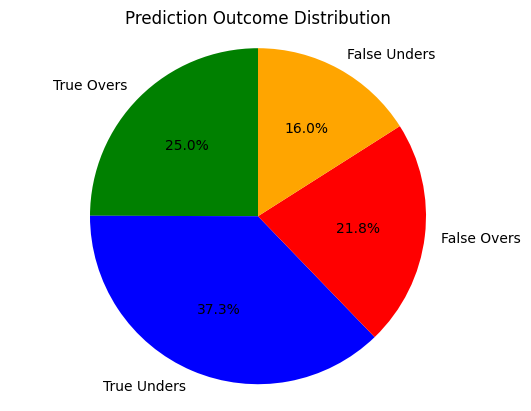

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['True Overs', 'True Unders', 'False Overs', 'False Unders']
values = [142, 212, 124, 91]
colors = ['green', 'blue', 'red', 'orange']  # Customizable colors

# Create the pie chart
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90)

# Add title
plt.title("Prediction Outcome Distribution")

# Ensure the circle's proportion
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:
df = pd.DataFrame(model_data)

for index, row in df.iterrows():
  if np.isnan(row["Projected"]) or row["Projected"] < 3:
    df.drop(index, axis=0, inplace=True)

df_13 = df[df["GameNumber"] == 13]

for index, row in df.iterrows():
  if row["GameNumber"] >= 13:
    df.drop(index, axis=0, inplace=True)

# Convert object columns to categorical
categorical_cols = ['PlayerName']  # Specify the columns to be treated as categorical
for col in categorical_cols:
    df[col] = df[col].astype('category')

categorical_cols = ['PlayerName']  # Specify the columns to be treated as categorical
for col in categorical_cols:
    df_13[col] = df_13[col].astype('category')

X = df.drop(['Points'], axis=1)  # Features
y = df['Points']  # Target (the 'Price' column)

X_13 = df_13.drop(['Points'], axis=1)

# split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train = X, X_13, y

# DMatrix stacks vectors to create data matrix
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True) # Removed feature_types
dtest = xgb.DMatrix(X_test, enable_categorical=True) # Removed feature_types

# set xgboost params
param = {
'max_depth': 3,  # the maximum depth of each tree
'eta': 0.3,  # the training step for each iteration
'objective': 'reg:squarederror'  # Changed to regression objective
}
num_round = 50  # the number of training iterations

# train
bst = xgb.train(param, dtrain, num_round)

# test
preds = bst.predict(dtest)
for i in range(len(preds)):
  if preds[i] < 0:
    preds[i] = 0

importance = bst.get_score(importance_type='weight')

# Print importance
print("Feature importance:", importance)
# evaluate

pred_df = pd.DataFrame({'Player': X_test['PlayerName'], 'Game Num': X_test['GameNumber'], 'Predicted': preds, 'Projected': X_test['Projected']})
display(pred_df)
# accuracy = []
# direction = []
# for index, row in pred_df.iterrows():
#   if row['Actual'] < row["Projected"] and row["Predicted"] < row["Projected"]:
#     accuracy.append(1)
#     direction.append("True Under")
#   elif row['Actual'] > row["Projected"] and row["Predicted"] > row["Projected"]:
#     accuracy.append(1)
#     direction.append("True Over")
#   elif row['Actual'] < row["Projected"] and row["Predicted"] > row["Projected"]:
#     accuracy.append(0)
#     direction.append("False Over")
#   elif row['Actual'] > row["Projected"] and row["Predicted"] < row["Projected"]:
#     accuracy.append(0)
#     direction.append("False Under")


# pred_df["Accuracy"] = accuracy
# pred_df["Direction"] = direction
# diff = []
# for index, row in pred_df.iterrows():
#   diff.append(row["Predicted"] - row["Projected"])
# pred_df["Difference"] = diff

# for index, row in pred_df.iterrows():
#   if row["Difference"] > 10:
#     pred_df.drop(index, axis=0, inplace=True)

# # display(pred_df)
# print(f"Accuracy: {sum(accuracy)/len(accuracy)}")
# print(f"True Unders: {sum(pred_df['Direction'] == 'True Under')}")
# print(f"True Overs: {sum(pred_df['Direction'] == 'True Over')}")
# print(f"False Unders: {sum(pred_df['Direction'] == 'False Under')}")
# print(f"False Overs: {sum(pred_df['Direction'] == 'False Over')}")

# results
# rmse = np.sqrt(mean_squared_error(y_test, preds))
# r2 = r2_score(y_test, preds)
# print(f"RMSE: {rmse}")
# print(f"R-squared: {r2}")


# rmse = np.sqrt(mean_squared_error(y_test, X_test['Projected']))
# r2 = r2_score(y_test, X_test['Projected'])
# print(f"RMSE: {rmse}")
# print(f"R-squared: {r2}")


Feature importance: {'PlayerName': 134.0, 'Opponent': 26.0, 'avTouches': 15.0, 'avReceptions': 9.0, 'avTargets': 7.0, 'avReceptionPercentage': 28.0, 'avPoints': 39.0, 'avReceivingYDS': 28.0, 'avReceivingTD': 5.0, 'GameNumber': 15.0, 'Projected': 29.0}


<ipython-input-8-118a3b18d3f6>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_13[col] = df_13[col].astype('category')


,Player,Game Num,Predicted,Projected
58,Parker Washington,13,4.492175,4.22
70,Zay Flowers,13,5.444946,11.32
117,Tyler Lockett,13,2.542786,5.73
140,Darnell Mooney,13,0.175122,9.21
194,Jerry Jeudy,13,7.020474,8.83
...,...,...,...,...
3141,Trey Palmer,13,1.097084,5.57
3152,Troy Franklin,13,4.154311,3.71
3163,Jakobi Meyers,13,12.235461,10.12
3175,Ladd McConkey,13,8.089098,10.79
